<a href="https://colab.research.google.com/github/pea-sys/Kaggle_Public/blob/master/ASHRAE_Great_Energy_Predictor_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***ASHRAE - Great Energy Predictor III Competition NoteBook***

## 【概要】(※Official和訳)
建物の効率を改善してコストと排出量を削減するために、多大な投資が行われています。では、改善は機能していますか？それがあなたの出番です。  
現在の推定方法は断片化されており、うまくスケールしません。特定のメータータイプを想定している場合や、異なる建物タイプでは機能しない場合もあります。  

省エネの開発には2つの重要な要素があります：改善なしで将来のエネルギー使用量を予測することと、特定の改善セットが実装された後のエネルギー使用量を予測します。  
エネルギー市場のより積極的な成長を妨げる1つの問題は、エネルギー使用量を予測するための費用効果が高く、正確で、スケーラブルな手順がないことです。   

このコンペティションでは、冷水、電気、天然ガス、温水、蒸気メーターなどの分野で、建物のエネルギー使用量を正確に予測します。データは、3年間で1,000を超える建物から取得されます。 これらの省エネ投資のより良い推定により、大規模な投資家や金融機関は、効率性の構築の進展を可能にするために、この分野に投資する傾向が強くなります。  

主催：ASHRAE社

## 【評価指標】
二乗平均平方根誤差(RMSLE)です
目的変数が裾の重い分布を持ち、変換しないままだと大きな値の影響が強い場合や、真の値と予測値の比率に着目したい場合に用いられる。  
対数をとるにあたっては、真の値が0のときに値が負に発散するのを避けるため、通常は1を加えてから対数をとる。numpyのlog1p関数が使用できる。



---


### 〇データセット
■train.csv -- shape(20125605, 16)
* building_id - 建物のメタデータの外部キー
* meter - メーターIDコード。 {0：電気、1：冷水、2：蒸気、3：温水}と読みます。 すべての建物にすべてのメータータイプがあるわけではありません。
* timestamp - 測定が行われたとき
* meter_reading - ターゲット変数。 kWh（または同等の）単位のエネルギー消費。これは、測定誤差のある実際のデータであり、モデリング誤差のベースラインレベルを課すと予想されることに注意してください。

■test.csv --- shape(41697600, 16)

■building_meta.csv
* site_id - wether.csvの外部キー。場所を表している。
* building_id - training.csvの外部キー。
* primary_use - [EnergyStarプロパティタイプの定義に基づいた、建物の主要な活動カテゴリのインジケータ](https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/identify-your-property-type)
* square_feet - 建物の総床面積
* year_built - 建物がオープンした年
* floor_count - 建物の階数  

■weather_[train/test].csv
* site_id - wether.csvの外部キー。場所を表している。
* air_temperature - 大気温　摂氏
* cloud_coverage -オクタの雲に覆われた空の部分。気象学では、オクタは、気象観測所などの特定の場所での雲量を表すために使用される測定単位です。
* dew_temperature - 露温度　摂氏
* precip_depth_1_hr - 降水量(ミリ)
* sea_level_pressure - 海水圧
* wind_direction - 風向き
* wind_speed - 風速(メートル毎秒)


---


###〇スケジュール
* 2019年12月12日-チーム合併の締め切り。 これは、参加者がチームに参加またはマージできる最後の日です。
* 2019年12月12日-応募締切。 競争するには、この日付の前に競争規則に同意する必要があります。
* 2019年12月19日-最終提出期限


---
## ★活動記録
- 10/16 コンペティション参加
- 10/17 実験を回すためにデータのpickle化
- 10/19～10/24 LGBMベースラインサブミット(Score 1.28)  。特徴生成するも効かず。たいして特徴追加していないが、早い段階でメモリ不足に悩まされる(Google Colab使用)。
- 10/25 メモリ不足に対応するため、訓練データと評価データをsite_id毎に分割し、site_id毎に予測モデルを作った。ディスカッションにsite_id毎に時刻がずれているという書き込みあり。
- 10/28 site_id=0の初月2か月分のメーター値が0だったので、ノイズデータとしてドロップ
- 10/29～11/2 特徴量を色々こねくり回したがスコア上がらず
- 11/3  [公開カーネル](https://www.kaggle.com/corochann/ashrae-training-lgbm-by-meter-type)を参考にメーターの種別毎にモデルを用意するように方針変更  
 　　 前処理し銀メダル圏に入る(Score 1.1)  
 　　ドロップ対象はイレギュラー的にメーター読み取り値が0になっていそうな箇所。これらのデータが含まれるビルの予測値がかなり低く見えたため削除した。
- 11/5 サブミッションファイルの0.1以下クリッピング
- 11/6～11/8 サブミッションファイルと訓練データの目視比較。特徴量設計しても相変わらず効かない。  
- 11/10 メーター読み取り値0のデータを更に削除(Score 1.08)  
- 11/13 訓練データの外れ値をクリッピング(Score1.07)  
- 11/15一部のビルの予測値がリークしていることが発覚  
こちらの[カーネル](https://www.kaggle.com/yamsam/ashrae-leak-data-station)が公平性を期するために逐次リークデータを提供してくれていた。リークデータは他にもあるとのことだったが、そこに力を入れるのはコンペの本筋ではないので定期的に上記カーネルの監視する程度で自分から探すことはしなかった。公開してくれる人には感謝。
- 11/16 各ビル毎に時刻別にメーター値平均を算出。ビルでの活動が非アクティブな場合は、メーター値が分散していないはずと考え、そこだけ切り出して線形回帰で予測。(Score 1.04)
- 11/17-11/19 ノートブック整理。最高スコアの再現性確認。
- 11/20 評価関数のカスタム。rmsleの+1を0.01とかに変えてみたら精度上がるかと思ったけど、そんなことはなかった。  
- 11/21 11/3にベースとして採用したカーネルはハイパーパラメータを1つのメーター種別で最適化していたので、各メーター毎に最適化するように修正。スコア変化なし。
- 11/22 更新されていた公開リークデータ使用(Score 0.99)
- 11/24 Score1.0の[公開カーネル](https://www.kaggle.com/huanglinyan/ashrae-may-make-it-up-to-1-0)とアンサンブル（Manual Weight)(Score 0.97)  
- 11/25 Score0.99の[公開カーネル](https://www.kaggle.com/yamsam/ashrae-leak-validation-and-more)とアンサンブル（Manual Weight)(Score 0.96)
- 11/26 最新リークデータ適用(Score 0.96) ※多分プライベートセット部分が更新
- 11/27-11/30 11/16の延長で低分散区間を週毎、月毎、曜日毎に線形回帰して、ベースモデルの予測値に上書き。初の金メダル圏6位に到達(Score 0.95) 
- 12/1-12/13 停滞期。スコアは全く伸びず。ランクはみるみる低下。測定データが部分的に欠損しているデータに対して線形補完後に、年間でメーター値推移を見た時に7月～8月を境にほとんど左右対称になっているビルのメーターに関しては、ピークを境に日付を畳み込みするとバリデーションスコアは劇的に伸びたが、提出スコアは凄い下がった。例えば、8月1日にピークがあるメーターに関しては、8月2日のデータを7月31日に置き換える。このようにすることで、過学習できないデータセットに対して、問題を簡単化できるのでは？と考えた。対応する月との相関が高い月のみ畳み込みした。スコアがあがるものと思い込んでいたががっかり。
- 12/16 しばらく予測値と訓練データをプロットして比較していた。線形回帰で変な値になってる箇所があったので、そこだけアンサンブルで上書きした。リーダーボードのスコアが小数点第3位まで表示されるようになっていた（Score 0.955)
- 12/17-12/18 怪しげなアカウントが大量にジャンプアップし始めて、みるみる順位が下がる。訓練データと予測データのアンサンブル。2016年と2017年の予測値で差異が見られる箇所を2016年のデータで上書き。スコア変動はなし。
- 12/19 コンペ最終日。一部の異常なメーター値を持つビルに関して、メーターの変化量を観察するとメーター値の変化量がある時を境に正常値に戻っていることに気付いたため、正常値とみられる訓練データのみ使用するように修正(Score 0.954)  
Public LeaderBoardは最終的に164位前後/3700チーム前後  
Private Scoreは457位と大幅にシェイクダウン。  

---
## ★反省点
今回はフルで参加した2回目のコンペティションということで、1回目より大分色々な手段が思いつくようになった。公開カーネルやディスカッションも前回ほどは使っていないので、自分で考えてアプローチできるようになってきたと思う。そのアプローチ方法が良いか悪いかは置いておくとして。
今回はメモリの問題で特徴量はせいぜい10個程度しか試しておらず、前処理に注力した。前処理はモデルに学習しやすいように問題を整形する過程であることがコンペの経験を通して実感できた。  
仕事でデータ分析をやる機会はほとんどないが、良い経験になった。
- 予測値検証を効率的にやる仕組みを用意するべきだった
- ノートブックをもっと細分化するべきだった。後半めちゃくちゃ重くてスクロールも一苦労していた。
- 前処理をほとんど人間系でやっていて、ほとんど泥臭い作業になっていたので便利なツールを探すのも一考  
- 一回のサブミッションに複数の試みを入れることがあったので、何が効いて何が効いていないか分かっていない箇所がある
- 色々試したけど、その過程でバグがいっぱい入っていると思う。やりたいことを優先して検証にはあまり時間をさけなかった。

今回のコンペティションは正直なところ運営のお粗末さにガッカリした。  
リークデータが2割程発見されたものの、そのリークデータの取り扱いがあいまいだったこと。最終順位の結果発表が2週間以上延期されたこと。不正者を駆逐すると公言したが実施しなかったこと。  などが挙げられる。


PublicBoard1位の人は,privateBoardで500位以上シェイクダウン、金メダル圏の人は全員金メダル圏から落ちて波乱のコンペであった。  

機械学習を学び始めてから丁度1年がたった。　
これに懲りずにKaggleに取り組んでいきたい。


---


※尚、今回は7個程度ノートブックを作成して、それぞれを組み合わせてサブミットファイルを作成しています。Githubにあげるにあたり、１つのノートブックに要点だけ集約しています。このノートブック単体では再現性もないし実行エラーが出ると思います。



In [0]:
import google.colab
import googleapiclient.discovery
import googleapiclient.http
google.colab.auth.authenticate_user()
drive_service = googleapiclient.discovery.build('drive', 'v3')

def gdrive_dl(filename):
  upload_filename = filename

  file_list = drive_service.files().list(q="name='" + upload_filename + "'").execute().get('files')

  # ファイル ID を取得します。
  file_id = None
  for file in file_list:
    if file.get('name') == upload_filename:
      file_id = file.get('id')
      break

  if file_id is None:
    # ファイル ID を取得できなかった場合はエラーメッセージを出力します。
    print(upload_filename + ' が見つかりません.')
  else:
    # colab 環境へファイルをアップロードします。
    with open(upload_filename, 'wb') as f:
      request = drive_service.files().get_media(fileId=file_id)
      media = googleapiclient.http.MediaIoBaseDownload(f, request)

      done = False
      while not done:
        progress_status, done = media.next_chunk()
        #print(100*progress_status.progress(), end="")
        #print("%完了")

    print('GoogleドライブからColab環境への[' + filename +']ファイル取り込みが完了しました.')

def gdrive_up(filename):

  file_metadata = {'name': filename,'mimeType': 'application/octet-stream'}
  media = googleapiclient.http.MediaFileUpload(filename,mimetype='application/octet-stream',resumable=True)
  created = drive_service.files().create(body=file_metadata,media_body=media, fields='id').execute()

In [0]:
gdrive_dl("kaggle.json")
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

GoogleドライブからColab環境への[kaggle.json]ファイル取り込みが完了しました.


In [0]:
!pip install git+git://github.com/pfnet/optuna.git@50759344231194046fc8f7968ce906428f36bee1

In [0]:
import gc
import os
from pathlib import Path
import sys

from tqdm import tqdm_notebook as tqdm
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display import display, HTML

# --- plotly ---
from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

# --- models ---
from sklearn import preprocessing
from sklearn.model_selection import KFold
import lightgbm as lgb


In [0]:
# Original code from https://www.kaggle.com/gemartin/load-data-reduce-memory-usage by @gemartin
# Modified to support timestamp type, categorical type
# Modified to add option to use float16 or not. feather format does not support float16.
from pandas.api.types import is_datetime64_any_dtype as is_datetime
from pandas.api.types import is_categorical_dtype

def reduce_mem_usage(df, use_float16=False):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        if is_datetime(df[col]) or is_categorical_dtype(df[col]):
            # skip datetime type or categorical type
            continue
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if use_float16 and c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

def preprocess(df):
    df["hour"] = df["timestamp"].dt.hour
    df["month"] = df["timestamp"].dt.month
    df["dayofweek"] = df["timestamp"].dt.dayofweek
    df["weekend"] = df["dayofweek"] >= 5

def preprocess_ex(df):
    df["hour"] = df["timestamp"].dt.hour
    df["day"] = df["timestamp"].dt.day
    df["month"] = df["timestamp"].dt.month
    df["dayofweek"] = df["timestamp"].dt.dayofweek
    df["weekend"] = df["dayofweek"] >= 5

def add_lag_feature(weather_df, window=3):
    group_df = weather_df.groupby('site_id')
    cols = ['air_temperature', 'cloud_coverage', 'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction', 'wind_speed']
    rolled = group_df[cols].rolling(window=window, min_periods=0)
    lag_mean = rolled.mean().reset_index().astype(np.float16)
    lag_max = rolled.max().reset_index().astype(np.float16)
    lag_min = rolled.min().reset_index().astype(np.float16)
    lag_std = rolled.std().reset_index().astype(np.float16)
    for col in cols:
        weather_df[f'{col}_mean_lag{window}'] = lag_mean[col]
        weather_df[f'{col}_max_lag{window}'] = lag_max[col]
        weather_df[f'{col}_min_lag{window}'] = lag_min[col]
        weather_df[f'{col}_std_lag{window}'] = lag_std[col]


def timestamp_align(df):
    df['offset'] = df.site_id.map(site_ids_offsets)
    df['timestamp_aligned'] = (df.timestamp - pd.to_timedelta(df.offset, unit='H'))
    df['timestamp'] = df['timestamp_aligned']
    del df['timestamp_aligned']
    return df

In [0]:
gdrive_dl("sample_submission.pickle")
gdrive_dl("building_metadata.csv")
gdrive_dl("train.csv")
gdrive_dl("weather_train.csv")
gdrive_dl("test.csv")
gdrive_dl("weather_test.csv")

GoogleドライブからColab環境への[sample_submission.pickle]ファイル取り込みが完了しました.
GoogleドライブからColab環境への[building_metadata.csv]ファイル取り込みが完了しました.
GoogleドライブからColab環境への[train.csv]ファイル取り込みが完了しました.
GoogleドライブからColab環境への[weather_train.csv]ファイル取り込みが完了しました.
GoogleドライブからColab環境への[test.csv]ファイル取り込みが完了しました.
GoogleドライブからColab環境への[weather_test.csv]ファイル取り込みが完了しました.


In [0]:
train_df = reduce_mem_usage(pd.read_csv('train.csv', parse_dates=['timestamp']))
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])
preprocess(train_df)
weather_train_df = reduce_mem_usage(pd.read_csv('weather_train.csv', parse_dates=['timestamp']))
building_meta_df = reduce_mem_usage(pd.read_csv('building_metadata.csv'))

Memory usage of dataframe is 616.95 MB
Memory usage after optimization is: 289.19 MB
Decreased by 53.1%
Memory usage of dataframe is 9.60 MB
Memory usage after optimization is: 4.93 MB
Decreased by 48.6%
Memory usage of dataframe is 0.07 MB
Memory usage after optimization is: 0.02 MB
Decreased by 65.4%


#前処理  

In [0]:
train_df = train_df.query('not (building_id <= 104 & meter == 0 & timestamp <= "2016-05-21")')
train_df = train_df.query('not (building_id == 1099 & meter == 2)')#1106極大はずれ値
train_df = train_df.query('not (building_id == 29 & meter == 0 & timestamp <= "2016-08-10")')#11/4 ADD
train_df = train_df.query('not (building_id == 954 & month <= 9)')  #1110 ADD

train_df.loc[(train_df['building_id'] == 163) & (train_df['meter'] == 3),'meter_reading'] = 0
train_df.loc[(train_df['building_id'] == 176) & (train_df['meter'] == 3),'meter_reading'] = 0
train_df.loc[(train_df['building_id'] == 195) & (train_df['meter'] == 3),'meter_reading'] = 0
train_df.loc[(train_df['building_id'] == 200) & (train_df['meter'] == 3),'meter_reading'] = 0
train_df.loc[(train_df['building_id'] == 244) & (train_df['meter'] == 3),'meter_reading'] = 0
train_df.loc[(train_df['building_id'] == 252) & (train_df['meter'] == 1),'meter_reading'] = 0
train_df.loc[(train_df['building_id'] == 263) & (train_df['meter'] == 3),'meter_reading'] = 0
train_df.loc[(train_df['building_id'] == 279) & (train_df['meter'] == 3),'meter_reading'] = 0
train_df.loc[(train_df['building_id'] == 287) & (train_df['meter'] == 3),'meter_reading'] = 0
train_df.loc[(train_df['building_id'] == 762) & (train_df['meter'] == 2),'meter_reading'] = 0
train_df.loc[(train_df['building_id'] == 1003) & (train_df['meter'] == 3),'meter_reading'] = 0
train_df.loc[(train_df['building_id'] == 1013) & (train_df['meter'] == 1),'meter_reading'] = 0
train_df.loc[(train_df['building_id'] == 1018) & (train_df['meter'] == 1),'meter_reading'] = 0
train_df.loc[(train_df['building_id'] == 1022) & (train_df['meter'] == 1),'meter_reading'] = 0
train_df.loc[(train_df['building_id'] == 1345) & (train_df['meter'] == 0),'meter_reading'] = 0

train_df = train_df.query('not (building_id == 29 & meter == 0 & timestamp <= "2016-08-10")')#11/4 ADD
train_df = train_df.query('not (building_id == 40 & meter == 0 & timestamp <= "2016-06-04")')#11/4 ADD
train_df = train_df.query('not (building_id == 43 & meter == 1 & timestamp <= "2016-06-17")')#11/4 ADD
train_df = train_df.query('not (building_id == 45 & meter == 0 & timestamp <= "2016-07-01")')#11/4 ADD
train_df =train_df.query('not (building_id == 53 & meter == 0 & hour == 23)') #1110 ADD Office	87742	1971.0	
train_df =train_df.query('not (building_id == 53 & meter == 0 & hour <= 4)') #1110 ADD 

train_df = train_df.query('not (building_id == 55 & meter == 0 & meter_reading == 0 & timestamp <= "2016-04-01")')#11/4 ADD

train_df = train_df.query('not (building_id == 60 & meter == 1 & timestamp <= "2016-05-21")')#11/4 ADD
train_df = train_df.query('not (building_id == 98 & meter == 1 & timestamp <= "2016-06-16")')#11/4 ADD
train_df = train_df.query('not (building_id <= 104 & meter == 0 & timestamp <= "2016-05-21")')
train_df = train_df.query('not (building_id == 258 & meter == 1 & "2016-10-01" <= timestamp <= "2016-12-01")')  #1110 ADD 
train_df = train_df.query('not (building_id == 260 & meter == 1 & "2016-06-01" <= timestamp < "2016-09-01")')  #1110 ADD 
train_df = train_df.query('not (building_id == 260 & meter == 1 & "2016-09-01" <= timestamp < "2016-12-01")')  #1110 ADD 
train_df = train_df.query('not (building_id == 331 & meter == 0 & "2016-10-01" <= timestamp < "2016-12-01" & 0 <= hour <= 16)')  #1110 ADD 
train_df = train_df.query('not (building_id == 419 & meter == 0 & month == 4 & hour != 19)')  #1110 ADD 
train_df = train_df.query('not (building_id == 499 & meter == 0 & 3 <= month < 6)')  #1110 ADD 
train_df = train_df.query('not (building_id == 499 & meter == 0 & 11 <= month)')  #1110 ADD

train_df = train_df.query('not (building_id == 604)')  #1110 ADD
train_df = train_df.query('not (building_id == 681 & meter == 0 & timestamp <= "2016-05-01")')  #1206 ADD
train_df = train_df.query('not (building_id == 799 & meter == 0 & month < 7)')  #1110 ADD
train_df = train_df.query('not (building_id == 802 & meter == 0 & month <= 9)')  #1110 ADD
train_df = train_df.query('not (building_id == 803 & meter == 0 & 10 <= month )')  #1110 ADD
train_df = train_df.query('not (building_id == 886 & meter == 0 & 6 <= month < 10 )')  #1110 ADD
train_df = train_df.query('not (building_id == 904 & meter == 0 & month <= 2)')  #1110 ADD
train_df = train_df.query('not (building_id == 909 & meter == 0 & month == 1)')  #1110 ADD

train_df = train_df.query('not (building_id == 986 & meter == 0 & month == 1)')  #1110 ADD
train_df = train_df.query('not (building_id == 997 & meter == 0 & month <= 6)')  #1110 ADD
train_df = train_df.query('not (building_id == 1094 & meter == 0 & timestamp < "2016-09-01")')  #1110 ADD 
train_df = train_df.query('not (building_id == 1099 & meter == 2)')#1106極大はずれ値
train_df = train_df.query('not (building_id == 1169 & meter == 0 & month <= 7)')  #1110 ADD
train_df = train_df.query('not (building_id == 1195 & meter == 0 & month <= 3)')  #1110 ADD
train_df = train_df.query('not (building_id == 1195 & meter == 0 & month == 12)')  #1110 ADD
train_df = train_df.query('not (building_id == 1221 & meter == 0 & timestamp <= "2016-11-04")')
train_df = train_df.query('not (building_id == 1241 & meter == 0 & 7 < month < 11)')#1110 ADD
train_df = train_df.query('not (building_id == 1250 & meter == 2 & timestamp <= "2016-12-21")')

train_df = train_df.query('not (building_id == 1264 & meter == 0 & "2016-09-01" < timestamp )') #1111 ADD
train_df = train_df.query('not (building_id == 1303 & meter == 0 & 2 == month )') #1111 ADD
train_df = train_df.query('not (building_id == 1359 & meter == 0 & 5 <= month <= 6 )') #1111 ADD
## meter1
train_df = train_df.query('not (building_id == 207 & meter == 1 &  month == 1 )') #1111 ADD
train_df = train_df.query('not (building_id == 207 & meter == 1 &  month == 7 )') #1111 ADD
train_df = train_df.query('not (building_id == 257 & meter == 1 &  11 <= month  )') #1111 ADD 4,5は保留
train_df = train_df.query('not (building_id == 258 & meter == 1 &  9 < month < 12  )') #1111 ADD
train_df = train_df.query('not (building_id == 259 & meter == 1 &  month < 4 )') #1111 ADD
train_df = train_df.query('not (building_id == 260 & meter == 1 &  month < 5 )') #1111 ADD
train_df = train_df.query('not (building_id == 751 & meter == 2 &   timestamp == "2016-06-02" )')
train_df = train_df.query('not (building_id == 769 & meter == 1 &  month < 4 )') #1111 ADD
train_df = train_df.query('not (building_id == 780 & meter == 1 &  10 < month )') #1111 ADD
train_df = train_df.query('not (building_id == 787 & meter == 1 &  month < 3)') #1111 ADD
train_df = train_df.query('not (building_id == 793 & meter == 1 &  month < 5)') #1111 ADD
train_df = train_df.query('not (building_id == 963 & meter == 1 &  10 < month)') #1111 ADD
train_df = train_df.query('not (building_id == 978 & meter == 1 &  month == 8)') #1111 ADD
train_df = train_df.query('not (building_id == 978 & meter == 1 &  month == 11)') #1111 ADD
train_df = train_df.query('not (building_id == 998 & meter == 1 &  month <= 2)') #1111 ADD
train_df = train_df.query('not (building_id == 1001 & meter == 1 &  month <= 3)') #1111 ADD
train_df = train_df.query('not (building_id == 1003 & meter == 1 &  month == 1)') #1111 ADD
train_df = train_df.query('not (building_id == 1015 & meter == 1 &  month <= 2)') #1111 ADD
train_df = train_df.query('not (building_id == 1028 & meter == 1 &  month <= 4)') #1111 ADD
train_df = train_df.query('not (building_id == 1028 & meter == 1 &  11 <= month)') #1111 ADD
train_df = train_df.query('not (building_id == 1088 & meter == 1 &  month <= 3)') #1111 ADD
train_df = train_df.query('not (building_id == 1130 & meter == 1 &  month <= 8)') #1111 ADD
train_df = train_df.query('not (building_id == 1219 & meter == 1 &  month <= 3)') #1111 ADD
train_df = train_df.query('not (building_id == 1290 & meter == 1 &  month == 2)') #1111 ADD

#meter 2
train_df = train_df.query('not (building_id == 751 & meter == 2 &   timestamp <"2016-02-04" )') #1207 ADD   3日に数時間欠損値あり。その間修理していたかも
train_df = train_df.query('not (building_id == 766 & meter == 2 &  month == 1 )') #1112 ADD
train_df = train_df.query('not (building_id == 774 & meter == 2 &  month == 1 )') #1112 ADD
train_df = train_df.query('not (building_id == 783 & meter == 2 &  month <= 11 )') #1112 ADD
train_df = train_df.query('not (building_id == 798 & meter == 2 &  6 <= month <= 9 )') #1112 ADD
train_df = train_df.query('not (building_id == 799 & meter == 2 &  6 <= month <= 9 )') #1112 ADD
train_df = train_df.query('not (building_id == 802 & meter == 2 &  6 <= month <= 9 )') #1112 ADD
train_df = train_df.query('not (building_id == 1072 & meter == 2 &  month <= 6 )') #1112 ADD #1073と形が似ている。データ補完したい
train_df = train_df.query('not (building_id == 1149 & meter == 2 &  5 <= month <= 9 )') #1112 ADD
train_df = train_df.query('not (building_id == 1189 & meter == 2 &  month == 1 )') #1112 ADD
train_df = train_df.query('not (building_id == 1218 & meter == 2 &  5 <= month <= 8 )') #1112 ADD
train_df = train_df.query('not (building_id == 1303 & meter == 2 &  2 <= month <= 5 )') #1112 ADD
train_df = train_df.query('not (building_id == 1305 & meter == 2 &  5 <= month <= 9 )') #1112 ADD
train_df = train_df.query('not (building_id == 1307 & meter == 2 &  6 <= month <= 8 )') #1112 ADD

#meter3
train_df = train_df.query('not (building_id == 109 & meter == 3 &  7 <= month <= 9 )') #1112 ADD
train_df = train_df.query('not (building_id == 112 & meter == 3 &  7 <= month <= 9 )') #1112 ADD
train_df = train_df.query('not (building_id == 114 & meter == 3 &  8 <= month <= 9 )') #1112 ADD
train_df = train_df.query('not (building_id == 163 & meter == 3 &  month == 1 )') #1112 ADD
train_df = train_df.query('not (building_id == 1011 & meter == 3 &  month == 6 )') #1112 ADD
train_df = train_df.query('not (building_id == 1011 & meter == 3 &  month == 9 )') #1112 ADD
train_df = train_df.query('not (building_id == 1017 & meter == 3 & 5 <= month <= 10 )') #1112 ADD
train_df = train_df.query('not (building_id == 1021 & meter == 3 & 5 <= month <= 6 )') #1112 ADD
train_df = train_df.query('not (building_id == 1302 & meter == 3 & 5 <= month <= 9 )') #1112 ADD

train_df = train_df.query('not (building_id == 1232 & meter == 1 & 7 <= month <= 9 )') #1215 ADD
train_df = train_df.query('not (building_id == 1238 & meter == 2 & 2 <= month <= 5 )') #1215 ADD

#時間別1115
train_df = train_df.query('not (building_id == 162 & meter == 1 & 0 <= hour <= 4 )') 
train_df = train_df.query('not (building_id == 171 & meter == 1 & 0 <= hour <= 4 )') 
train_df = train_df.query('not (building_id == 171 & meter == 1 & 22 <= hour)') 
train_df = train_df.query('not (building_id == 176 & meter == 1 & 22 <= hour)') 
train_df = train_df.query('not (building_id == 176 & meter == 1 & 0 <= hour <= 3 )')
train_df = train_df.query('not (building_id == 282 & meter == 1 & 0 <= hour <= 5 )')
train_df = train_df.query('not (building_id == 282 & meter == 1 & 21 <= hour)')
train_df = train_df.query('not (building_id == 287 & meter == 3)')
train_df = train_df.query('not (building_id == 290 & meter == 1 & 22 <= hour)')
#train_df = train_df.query('not (building_id == 304 & meter == 0)')
#train_df = train_df.query('not (building_id == 345 & meter == 0)')　
train_df = train_df.query('not (building_id == 356 & meter == 0)')
train_df = train_df.query('not (building_id == 357 & meter == 0)')
train_df = train_df.query('not (building_id == 402 & meter == 0)')
train_df = train_df.query('not (building_id == 408 & meter == 0)')
train_df = train_df.query('not (building_id == 413 & meter == 0)')
train_df = train_df.query('not (building_id == 416 & meter == 0)')
train_df = train_df.query('not (building_id == 740 & meter == 0)')
train_df = train_df.query('not (building_id == 770 & meter == 1 & 0 <= hour <= 3)')
train_df = train_df.query('not (building_id == 804 & meter == 0)')
train_df = train_df.query('not (building_id == 805 & meter == 0)')
train_df = train_df.query('not (building_id == 808 & meter == 0)')
train_df = train_df.query('not (building_id == 810 & meter == 0)')
train_df = train_df.query('not (building_id == 811 & meter == 0)')
train_df = train_df.query('not (building_id == 812 & meter == 0)')
train_df = train_df.query('not (building_id == 813 & meter == 0)')
train_df = train_df.query('not (building_id == 815 & meter == 0)')
train_df = train_df.query('not (building_id == 817 & meter == 0)')
train_df = train_df.query('not (building_id == 820 & meter == 0)')
train_df = train_df.query('not (building_id == 824 & meter == 0)')
train_df = train_df.query('not (building_id == 833 & meter == 0)')
train_df = train_df.query('not (building_id == 845 & meter == 0 & month <= 9)')
train_df = train_df.query('not (building_id == 846 & meter == 0)')
train_df = train_df.query('not (building_id == 849 & meter == 0)')
train_df = train_df.query('not (building_id == 857 & meter == 0)')
train_df = train_df.query('not (building_id == 859 & meter == 0)')
train_df = train_df.query('not (building_id == 860 & meter == 0)')
train_df = train_df.query('not (building_id == 861 & meter == 0)')
train_df = train_df.query('not (building_id == 870 & meter == 0)')
train_df = train_df.query('not (building_id == 870 & meter == 0)')
train_df = train_df.query('not (building_id == 873 & meter == 0)')
train_df = train_df.query('not (building_id == 1101 & meter == 1 & 1 <= hour <= 5)')
train_df = train_df.query('not (building_id == 1101 & meter == 1 & 23 <= hour)')
train_df = train_df.query('not (building_id == 1207 & meter == 2 & 20 <= hour)')
train_df = train_df.query('not (building_id == 1207 & meter == 2 &  hour <= 2)')
train_df = train_df.query('not (building_id == 1211 & meter == 1 & 23 <= hour)')
train_df = train_df.query('not (building_id == 1211 & meter == 1 & hour <= 6)')
train_df = train_df.query('not (building_id == 1213 & meter == 0 & 9 <= hour <= 17)')
train_df = train_df.query('not (building_id == 1216 & meter == 1 & hour <= 5)')
train_df = train_df.query('not (building_id == 1217 & meter == 1 & hour <= 5)')
train_df = train_df.query('not (building_id == 1217 & meter == 1 & 23 <= hour )')
train_df = train_df.query('not (building_id == 1219 & meter == 1 & 21 <= hour )')
train_df = train_df.query('not (building_id == 1219 & meter == 1 & hour <= 5 )')
train_df = train_df.query('not (building_id == 1245 & meter == 1 & 5 <= hour <= 9)')
train_df = train_df.query('not (building_id == 1259 & meter == 2)')
train_df = train_df.query('not (building_id == 1262 & meter == 3 & 3 <= hour <= 8)')
train_df = train_df.query('not (building_id == 1270 & meter == 0 & 3 <= hour <= 11)')
train_df = train_df.query('not (building_id == 1273 & meter == 0 & 5 <= hour <= 10)')
train_df = train_df.query('not (building_id == 1273 & meter == 1 & 5 <= hour <= 10)')
train_df = train_df.query('not (building_id == 1274 & meter == 1 & 4 <= hour <= 10)')
train_df = train_df.query('not (building_id == 1336 & meter == 1)')
train_df = train_df.query('not (building_id == 1375 & meter == 1 & 3 <= hour <= 5)')
train_df = train_df.query('not (building_id == 1391 & meter == 1 & 0 <= hour <= 4)')
train_df = train_df.query('not (building_id == 1398 & meter == 1 & 1 <= hour <= 4)')
train_df = train_df.query('not (building_id == 1425 & meter == 0 & 22 <= hour)')
train_df = train_df.query('not (building_id == 1425 & meter == 0 & hour <= 4)')
train_df = train_df.query('not (building_id == 1446 & meter == 0 & 0 <= hour <= 5)')
train_df = train_df.query('not (building_id == 1446 & meter == 0 & 20 <= hour <= 22)')

In [0]:
#外れ値除外
for id in train_df['building_id'].unique():
  df = train_df[train_df['building_id'] == id]
  for m in df['meter'].unique():
    df = df[df['meter'] == m]

    if (abs(df.sort_values('meter_reading', ascending=False)['meter_reading_log1p'][0:2].diff()) > 0.3).sum() > 0:
      train_df = train_df.drop(df['meter_reading'].idxmax())
    if (abs(df.sort_values('meter_reading', ascending=True)['meter_reading_log1p'][0:2].diff()) > 0.3).sum() > 0:
      train_df = train_df.drop(df['meter_reading'].idxmin())

del df

#線形補完ノートブック（抜粋)　始点

In [0]:

spline = pd.DataFrame([], columns=train_df.columns)
temp = train_df.groupby(['building_id','meter','month']).count().reset_index()
#補完可能な欠損割合を決定(年間データが6割から9.5割のみ存在するビルの測定データを追加)
#あまりに多くの測定データを欠損しているビルは本質的なデータが捉えられないので無視する
temp = temp[(temp['meter_reading'] <= 24 * 29 * 0.95) & (temp['meter_reading'] >= 24 * 29 * 0.6)]
temp['building_id'].unique()

In [0]:
train_df = train_df[train_df['building_id'].isin(temp['building_id'].unique())]
del temp
train_df['building_id'].unique()

In [0]:
add_df = train_df.copy()
add_df =add_df['timestamp'].reset_index()
add_df = add_df.drop_duplicates(subset='timestamp')
del add_df['index']

In [0]:
#補完対象のプロット目視選別(meter * 10) + building_id)
spline_building = [10050,10097,10098,30192,30202,296,298,299,300,376,483,500,522,544,10745,20745,10789,20789,10790,20790,10791,20791,10792,20792,805,
806,807,808,809,810,811,815,816,818,819,820,821,822,823,824,825,826,827,830,831,832,833,834,835,836,837,838,839,840,841,842,843,845,846,847,848,849,850,851,852,853,
854,855,856,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,20878,10928,998,999,1002,31003,1004,1005,1006,1007,1014,1018,1021,1022,1148,1222,
11239,31258,11267,31269,11273,21285,21288,11291,11293,11300,21306,21315,1318,1326,11326,21326,1327,1328,11328,1329,11329,21329,21330,1331,11331,21331,31331,1332,11332,21332,1333,11333,1334,11334,1335,1336,11336,21336,1337,11337,21337,
1338,21338,1339,11339,21339,1341,11341,21341,1342,11342,21342,1343,11343,21343,1344,11344,21344,1345,11345,21345,
11347,21347,1348,11348,21348,11349,1350,11350,1352,11352,1353,11354,21354,1356,1357,1358,21358,1359,11359,1360,21360,11362,1363,11363,
21363,1364,21364,1365,1366,11366,21366,1367,11367,21367,1368,11368,1369,21369,1370,1371,11372,11375,1376,11376,1377,11377,
21377,1378,21378,11379,21379,1380,11380,1381,21381,1382,11382,21382,1386,21387,11388,1389,11389,1390,21390,1391,1393,1394,11394,1395,11395,1396,21396,1398,1399]
#10184,#492,#545,#20762,#767,#804,#812,#813,#814,#817,#829,#983,#21077,#11225,#11226,#1325,#31325,#21327,#1340,
#1346,#21346,1347,


In [0]:
from scipy import signal, interpolate
from matplotlib import pylab as plt
#spl_df = pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
for item in spline_building:
  bid = item % 10000
  m = item // 10000
  spl_df = train_df.loc[(train_df.building_id == bid) & (train_df.meter == m)] 
  print(str(bid) + str(m))
  spl_df = add_df.merge(spl_df,on='timestamp',how='left')
  prelineCnt = len(spl_df[spl_df['meter_reading'].isnull()])
  spl_df = spl_df.interpolate(limit_direction='both')
  aftlineCnt = len(spl_df[spl_df['meter_reading'].isnull()])

  if prelineCnt != aftlineCnt:
    print('origin train_df',train_df.shape)
    train_df = train_df.loc[~((train_df.building_id == bid) & (train_df.meter == m))]
    print('drop train_df',train_df.shape)
    train_df = pd.concat([train_df, spl_df])
    print('train_df',train_df.shape)
    print('building_id=',str(bid),'meter',str(m))

train_df = train_df[~train_df['meter_reading'].isnull()]
train_df = train_df[['building_id', 'meter', 'meter_reading', 'timestamp']]
#train_df.to_csv('lineComplement.csv')
#gdrive_up('lineComplement.csv')

#畳み込み

In [0]:
gdrive_dl('lineComplement.csv')
train_org = reduce_mem_usage(pd.read_csv('lineComplement.csv',parse_dates=['timestamp']))
del train_org['Unnamed: 0']
preprocess(train_org)

In [0]:
#畳み込み対象調査
df = train_org

for id in train_org['building_id'].unique():
  for m in train_org[train_org['building_id'] == id]['meter'].unique():
    df2 = (train_org[(train_org['building_id'] == id) & (train_org['meter'] == m)])
    if len(df2) != 0:
      print('building_id=',str(id),'meter=',str(m))
      df2['9-7'] = np.log1p(df2[df2['month'] == 9]['meter_reading'].mean()) -np.log1p(df2[df2['month'] == 7]['meter_reading'].mean())
      df2['10-6'] = np.log1p(df2[df2['month'] == 10]['meter_reading'].mean()) - np.log1p(df2[df2['month'] == 6]['meter_reading'].mean())
      df2['11-5'] = np.log1p(df2[df2['month'] == 11]['meter_reading'].mean()) - np.log1p(df2[df2['month'] == 5]['meter_reading'].mean())
      df2['12-4'] = np.log1p(df2[df2['month'] == 12]['meter_reading'].mean()) - np.log1p(df2[df2['month'] == 4]['meter_reading'].mean())
      df = df.append(df2)

#線形補完ノートブック（抜粋)　終点

In [0]:
gdrive_dl('lineComplement.csv')
train_df = pd.read_csv('lineComplement.csv',parse_dates=['timestamp'])
del train_df['Unnamed: 0']

GoogleドライブからColab環境への[lineComplement.csv]ファイル取り込みが完了しました.


In [0]:
train_df['date'] = train_df['timestamp'].dt.date
train_df['meter_reading_log1p'] = np.log1p(train_df['meter_reading'])

In [0]:
#低分散の線形回帰対象を訓練データから削除
drop_lst = ['20191130_OutlierAll.csv','20191130_OutlierWeek.csv','20191130_OutlierHour.csv']
drop_df = pd.DataFrame()
for s in drop_lst:
  gdrive_dl(s)
  drop_df = drop_df.append(reduce_mem_usage(pd.read_csv(s)))
  print(drop_df.shape)

drop_df = drop_df.query('not (building_id == 279)') '精度が低いため
drop_df =drop_df.drop('Unnamed: 0',axis=1)
drop_df['timestamp'] = pd.to_datetime(drop_df['timestamp'])
drop_df = drop_df.drop_duplicates()
drop_df.shape

In [0]:
train_df['merge'] = (train_df['building_id'] * 10000000) + (train_df['meter'] * 1000000) + (train_df['timestamp'].dt.month * 10000) + (train_df['timestamp'].dt.day * 100) + train_df['timestamp'].dt.hour
drop_df['merge'] =  (drop_df['building_id']  * 10000000) + (drop_df['meter']  * 1000000) + (drop_df['timestamp'].dt.month  * 10000) + (drop_df['timestamp'].dt.day  * 100) + drop_df['timestamp'].dt.hour
train_df = train_df[~train_df['merge'].isin(drop_df['merge'].unique())]
del train_df['merge'] ,drop_df

In [0]:
debug = False

In [0]:
df_group = train_df.groupby(['building_id', 'meter'])['meter_reading_log1p']
building_mean = df_group.mean().astype(np.float16)
building_median = df_group.median().astype(np.float16)
building_min = df_group.min().astype(np.float16)
building_max = df_group.max().astype(np.float16)
building_std = df_group.std().astype(np.float16)

In [0]:
building_stats_df = reduce_mem_usage(pd.concat([building_mean, building_median, building_min, building_max, building_std], axis=1,
                              keys=['building_mean', 'building_median', 'building_min', 'building_max', 'building_std']).reset_index())
train_df = reduce_mem_usage(pd.merge(train_df, building_stats_df, on=['building_id', 'meter'], how='left', copy=False))

Memory usage of dataframe is 0.06 MB
Memory usage after optimization is: 0.06 MB
Decreased by -7.7%
Memory usage of dataframe is 2241.22 MB
Memory usage after optimization is: 1353.62 MB
Decreased by 39.6%


In [0]:
#1106 メーター別　当該月のの平均　当該月の週毎の平均　当該月の時間毎の平均
#未実施メモリ不足
'''
#月平均
temp = train_df[['building_id','meter','month','meter_reading','dayofweek','hour']]
temp = reduce_mem_usage(temp.groupby(['building_id','meter','month'])['meter_reading'].mean().reset_index())
temp = temp.rename(columns={'meter_reading': 'meter_monthmean'}) 
#df = pd.merge(df,temp, on=['building_id', 'meter','month'],how='left',copy=False)
#週平均
temp2 = train_df[['building_id','meter','month','meter_reading','dayofweek','hour']]
temp2 = reduce_mem_usage(temp2.groupby(['building_id','month','dayofweek','meter'])['meter_reading'].mean().reset_index())
temp2 = temp2.rename(columns={'meter_reading': 'meter_weekmean'}) 
#df = pd.merge(df,temp, on=['building_id', 'meter','month','dayofweek'],how='left',copy=False)

#train_df = meteraverage(train_df)
#train_df.head()
df = pd.merge(temp2,temp, on=['building_id','meter','month'],how='left',copy=False)
del temp, temp2

#時間平均
temp3 = train_df[['building_id','meter','month','meter_reading','dayofweek','hour']]
temp3 = reduce_mem_usage(temp3.groupby(['building_id','month','hour','meter'])['meter_reading'].mean().reset_index())
temp3 = temp3.rename(columns={'meter_reading': 'meter_hourmean'}) 
#df = pd.merge(df,temp, on=['building_id', 'meter','month','hour'],how='left',copy=False)

df = reduce_mem_usage(pd.merge(df,temp3, on=['building_id','meter','month'],how='left',copy=False))
del temp3
train_df = pd.merge(train_df,df, on=['building_id','meter','month'],how='left',copy=False)
train_df.head()
'''

"\n#月平均\ntemp = train_df[['building_id','meter','month','meter_reading','dayofweek','hour']]\ntemp = reduce_mem_usage(temp.groupby(['building_id','meter','month'])['meter_reading'].mean().reset_index())\ntemp = temp.rename(columns={'meter_reading': 'meter_monthmean'}) \n#df = pd.merge(df,temp, on=['building_id', 'meter','month'],how='left',copy=False)\n#週平均\ntemp2 = train_df[['building_id','meter','month','meter_reading','dayofweek','hour']]\ntemp2 = reduce_mem_usage(temp2.groupby(['building_id','month','dayofweek','meter'])['meter_reading'].mean().reset_index())\ntemp2 = temp2.rename(columns={'meter_reading': 'meter_weekmean'}) \n#df = pd.merge(df,temp, on=['building_id', 'meter','month','dayofweek'],how='left',copy=False)\n\n#train_df = meteraverage(train_df)\n#train_df.head()\ndf = pd.merge(temp2,temp, on=['building_id','meter','month'],how='left',copy=False)\ndel temp, temp2\n\n#時間平均\ntemp3 = train_df[['building_id','meter','month','meter_reading','dayofweek','hour']]\ntemp3 = redu

In [0]:
weather_test_df = reduce_mem_usage(pd.read_csv('weather_test.csv', parse_dates=['timestamp']))
weather = pd.concat([weather_train_df, weather_test_df],ignore_index=True)
del weather_test_df
weather_key = ['site_id', 'timestamp']

Memory usage of dataframe is 19.04 MB
Memory usage after optimization is: 9.78 MB
Decreased by 48.6%


In [0]:
#時間補正
# https://www.kaggle.com/nz0722/aligned-timestamp-lgbm-by-meter-type

temp_skeleton = weather[weather_key + ['air_temperature']].drop_duplicates(subset=weather_key).sort_values(by=weather_key).copy()

# calculate ranks of hourly temperatures within date/site_id chunks
temp_skeleton['temp_rank'] = temp_skeleton.groupby(['site_id', temp_skeleton.timestamp.dt.date])['air_temperature'].rank('average')

# create a dataframe of site_ids (0-16) x mean hour rank of temperature within day (0-23)
df_2d = temp_skeleton.groupby(['site_id', temp_skeleton.timestamp.dt.hour])['temp_rank'].mean().unstack(level=1)

# Subtract the columnID of temperature peak by 14, getting the timestamp alignment gap.
site_ids_offsets = pd.Series(df_2d.values.argmax(axis=1) - 14)
site_ids_offsets.index.name = 'site_id'

del weather
del temp_skeleton
gc.collect()

626

In [0]:
# 畳み込み
# スコアとても下がる
'''
conv = [300	,303	,304	,305	,306	,307	,308	,310	,311	,321	,322	,328	,329	,332	,333	,
334	,336	,342	,343	,348	,349	,353	,354	,355	,357	,358	,359	,361	,366	,369	,370	,
373	,374	,376	,377	,378	,380	,381	,384	,386	,388	,391	,393	,395	,397	,398	,399	,
400	,406	,410	,412	,414	,415	,416	,419	,422	,423	,424	,425	,427	,428	,429	,430	,
431	,433	,436	,438	,439	,442	,445	,446	,450	,452	,453	,456	,458	,459	,460	,462	,
464	,465	,467	,468	,470	,472	,473	,474	,476	,477	,478	,480	,481	,490	,493	,497	,498	,502	,504	,511	,
515	,519	,520	,521	,527	,529	,533	,535	,541	,544	,546	,547	,552	,554	,557	,558	,561	,563	,564	,605	,
623	,625	,676	,682	,686	,693	,694	,695	,746	,20747,10748,10752,20754,10755,20757,20759,
10763,10765,20765,20769,10770,20770,771	,10771	,20771,20774,10777	,10780	,20784	,10786	,
10787	,20787	,10789	,20789	,10790	,20790	,10791	,20791	,
10792	,20792	,10794	,20794	,10795	,20795	,10796	,20796	,10797	,20797	,
10798	,20798	,10799	,20799	,858	,859	,862	,869	,871	,10874	,
20875	,10878	,10879	,10883	,10885	,20885	,10886	,20886	,
10887	,20887	,20888	,10889	,10890	,10890	,10893	,10894	,
20894	,10895	,10896	,10898	,20898	,10899	,20899	,10900	,
10905	,10906	,10908	,20908	,10910	,20910	,10911	,
20911	,10912	,20912	,10914	,20914	,10917	,20917	,10918	,
20918	,10920	,20920	,10921	,20921	,10922	,20922	,10924	,
20924	,10925	,20925	,10926	,20926	,10928	,
20928	,10929	,20929	,10931	,20931	,10932	,10935	,
939	,10948	,20948	,10949,20949	,10951	,20951	,10956	,20956	,10964	,
20964	,10965	,10966	,20966	,10968	,20968	,10969	,20969	,
20971	,10972	,10973	,20973	,10974	,
20974	,20978	,10979	,20979	,10980	,10987	,20987	,10991	,
20991	,10992	,20992	,10993	,10995	,20995	,20998	,30998]
turn_start = datetime.date(2016, 8, 1)
turn_end = datetime.date(2016, 11, 1)
cnv_df = train_df.query('("2016-08-01" < timestamp &  timestamp < "2016-11-01" )')
train_df = train_df.query('not ("2016-08-01" < timestamp &  timestamp < "2016-11-01" )')
for item in conv:
  bid = item % 10000
  m = item // 10000
  tmp = cnv_df.loc[(cnv_df['building_id'] == bid) & (cnv_df['meter'] == m)]
  if len(tmp) > 0 :
    cnv_df.loc[(cnv_df['building_id'] == bid) & (cnv_df['meter'] == m),'timestamp'] = cnv_df[(cnv_df['building_id'] == bid) & (cnv_df['meter'] == m)]['timestamp'] - ((cnv_df[(cnv_df['building_id'] == bid) & (cnv_df['meter'] == m)]['timestamp'].dt.date  - turn_start) * 2)
  
preprocess(cnv_df)
print(train_df.shape,cnv_df.shape)
train_df =pd.concat([train_df,cnv_df])
print(train_df.shape)
del cnv_df
'''

'\nconv = [300\t,303\t,304\t,305\t,306\t,307\t,308\t,310\t,311\t,321\t,322\t,328\t,329\t,332\t,333\t,\n334\t,336\t,342\t,343\t,348\t,349\t,353\t,354\t,355\t,357\t,358\t,359\t,361\t,366\t,369\t,370\t,\n373\t,374\t,376\t,377\t,378\t,380\t,381\t,384\t,386\t,388\t,391\t,393\t,395\t,397\t,398\t,399\t,\n400\t,406\t,410\t,412\t,414\t,415\t,416\t,419\t,422\t,423\t,424\t,425\t,427\t,428\t,429\t,430\t,\n431\t,433\t,436\t,438\t,439\t,442\t,445\t,446\t,450\t,452\t,453\t,456\t,458\t,459\t,460\t,462\t,\n464\t,465\t,467\t,468\t,470\t,472\t,473\t,474\t,476\t,477\t,478\t,480\t,481\t,490\t,493\t,497\t,498\t,502\t,504\t,511\t,\n515\t,519\t,520\t,521\t,527\t,529\t,533\t,535\t,541\t,544\t,546\t,547\t,552\t,554\t,557\t,558\t,561\t,563\t,564\t,605\t,\n623\t,625\t,676\t,682\t,686\t,693\t,694\t,695\t,746\t,20747,10748,10752,20754,10755,20757,20759,\n10763,10765,20765,20769,10770,20770,771\t,10771\t,20771,20774,10777\t,10780\t,20784\t,10786\t,\n10787\t,20787\t,10789\t,20789\t,10790\t,20790\t,10791\t,20791\t,\n1

In [0]:
weather_train_df = timestamp_align(weather_train_df)
weather_train_df = weather_train_df.groupby('site_id').apply(lambda group: group.interpolate(limit_direction='both'))

In [0]:
#1109 祝日データ
import holidays

def add_holiday(df_weather):
  en_holidays = holidays.England()
  ir_holidays = holidays.Ireland()
  ca_holidays = holidays.Canada()
  us_holidays = holidays.UnitedStates()

  en_idx = df_weather.query('site_id == 1 or site_id == 5').index
  ir_idx = df_weather.query('site_id == 12').index
  ca_idx = df_weather.query('site_id == 7 or site_id == 11').index
  us_idx = df_weather.query('site_id == 0 or site_id == 2 or site_id == 3 or site_id == 4 or site_id == 6 or site_id == 8 or site_id == 9 or site_id == 10 or site_id == 13 or site_id == 14 or site_id == 15').index

  df_weather['IsHoliday'] = 0
  df_weather.loc[en_idx, 'IsHoliday'] = df_weather.loc[en_idx, 'timestamp'].apply(lambda x: en_holidays.get(x, default=0))
  df_weather.loc[ir_idx, 'IsHoliday'] = df_weather.loc[ir_idx, 'timestamp'].apply(lambda x: ir_holidays.get(x, default=0))
  df_weather.loc[ca_idx, 'IsHoliday'] = df_weather.loc[ca_idx, 'timestamp'].apply(lambda x: ca_holidays.get(x, default=0))
  df_weather.loc[us_idx, 'IsHoliday'] = df_weather.loc[us_idx, 'timestamp'].apply(lambda x: us_holidays.get(x, default=0))

  holiday_idx = df_weather['IsHoliday'] != 0
  df_weather.loc[holiday_idx, 'IsHoliday'] = 1
  df_weather['IsHoliday'] = df_weather['IsHoliday'].astype(np.uint8)

add_holiday(weather_train_df)

In [0]:
add_lag_feature(weather_train_df, window=3)
#add_lag_feature(weather_train_df, window=24)下がる
add_lag_feature(weather_train_df, window=72)

In [0]:
# categorize primary_use column to reduce memory on merge...

primary_use_list = building_meta_df['primary_use'].unique()
primary_use_dict = {key: value for value, key in enumerate(primary_use_list)} 
print('primary_use_dict: ', primary_use_dict)
building_meta_df['primary_use'] = building_meta_df['primary_use'].map(primary_use_dict)

gc.collect()

primary_use_dict:  {'Education': 0, 'Lodging/residential': 1, 'Office': 2, 'Entertainment/public assembly': 3, 'Other': 4, 'Retail': 5, 'Parking': 6, 'Public services': 7, 'Warehouse/storage': 8, 'Food sales and service': 9, 'Religious worship': 10, 'Healthcare': 11, 'Utility': 12, 'Technology/science': 13, 'Manufacturing/industrial': 14, 'Services': 15}


0

In [0]:
train_df = reduce_mem_usage(train_df, use_float16=True)
building_meta_df = reduce_mem_usage(building_meta_df, use_float16=True)
weather_train_df =reduce_mem_usage(weather_train_df, use_float16=True)

Memory usage of dataframe is 1353.62 MB
Memory usage after optimization is: 954.19 MB
Decreased by 29.5%
Memory usage of dataframe is 0.02 MB
Memory usage after optimization is: 0.02 MB
Decreased by 24.1%
Memory usage of dataframe is 21.06 MB
Memory usage after optimization is: 18.40 MB
Decreased by 12.7%


In [0]:

category_cols = ['building_id', 'site_id', 'primary_use', 'meter','dayofweek','building_median']
weather_cols = [
    'air_temperature', 'cloud_coverage',
    'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
    'wind_direction', 'wind_speed', 'air_temperature_mean_lag72',
    'air_temperature_max_lag72', 'air_temperature_min_lag72',
    'air_temperature_std_lag72', 'cloud_coverage_mean_lag72',
    'dew_temperature_mean_lag72', 'precip_depth_1_hr_mean_lag72',
    'sea_level_pressure_mean_lag72', 'wind_direction_mean_lag72',
    'wind_speed_mean_lag72', 'air_temperature_mean_lag3',
    'air_temperature_max_lag3',
    'air_temperature_min_lag3', 'cloud_coverage_mean_lag3',
    'dew_temperature_mean_lag3',
    'precip_depth_1_hr_mean_lag3', 'sea_level_pressure_mean_lag3',
    'wind_direction_mean_lag3', 'wind_speed_mean_lag3']
custom_feature = ['offset','IsHoliday']#'meter_month_zero','meter_month_zerosum'
feature_cols = ['square_feet', 'year_built'] + [
    'hour', 'weekend' # 'month' 'dayofweek''building_median'
    ] + weather_cols + custom_feature

In [0]:
def create_X_y(train_df, target_meter):
    
    target_train_df = train_df[train_df['meter'] == target_meter]
    target_train_df = target_train_df.merge(building_meta_df, on='building_id', how='left')
    target_train_df = target_train_df.merge(weather_train_df, on=['site_id', 'timestamp'], how='left')
    #https://www.kaggle.com/c/ashrae-energy-prediction/discussion/119261#latest-693904
    target_train_df.loc[(target_train_df['site_id'] == 0) & (target_train_df['meter'] == 0), 'meter_reading'] = target_train_df[(target_train_df['site_id'] == 0) & (target_train_df['meter'] == 0)]['meter_reading'] * 0.2931
    
    X_train = target_train_df[feature_cols + category_cols]
    y_train = target_train_df['meter_reading_log1p'].values

    del target_train_df
    return X_train, y_train

In [0]:
import optuna
from optuna import Trial

optuna.__version__

'0.17.1'

In [0]:
debug = False

train_df_original = train_df
# Only use 10000 data,,, for fast computation for debugging.
train_df = train_df.sample(10000)

In [0]:
def objective(trial: Trial, fast_check=True, target_meter=0, return_info=False):
    folds = 5
    seed = 666
    shuffle = False
    kf = KFold(n_splits=folds, shuffle=shuffle, random_state=seed)

    X_train, y_train = create_X_y(train_df, target_meter=target_meter)
    y_valid_pred_total = np.zeros(X_train.shape[0])
    gc.collect()
    print('target_meter', target_meter, X_train.shape)

    cat_features = [X_train.columns.get_loc(cat_col) for cat_col in category_cols]
    print('cat_features', cat_features)

    models = []
    valid_score = 0
    for train_idx, valid_idx in kf.split(X_train, y_train):
        train_data = X_train.iloc[train_idx,:], y_train[train_idx]
        valid_data = X_train.iloc[valid_idx,:], y_train[valid_idx]

        print('train', len(train_idx), 'valid', len(valid_idx))
    #     model, y_pred_valid, log = fit_cb(train_data, valid_data, cat_features=cat_features, devices=[0,])
        model, y_pred_valid, log = fit_lgbm(trial, train_data, valid_data, cat_features=category_cols,
                                            num_rounds=1000)
        y_valid_pred_total[valid_idx] = y_pred_valid
        models.append(model)
        gc.collect()
        valid_score += log["valid/l2"]
        if fast_check:
            break
    valid_score /= len(models)
    if return_info:
        return valid_score, models, y_pred_valid, y_train
    else:
        return valid_score

In [0]:
# Referred https://github.com/pfnet/optuna/blob/master/examples/lightgbm_simple.py

def fit_lgbm(trial, train, val, devices=(-1,), seed=None, cat_features=None, num_rounds=1500):
    """Train Light GBM model"""
    X_train, y_train = train
    X_valid, y_valid = val
    metric = 'l2'
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'objective': 'regression',
#               'max_depth': -1,
        'learning_rate': 0.1,
        "boosting": "gbdt",
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        "bagging_freq": 5,
        "bagging_fraction": trial.suggest_uniform('bagging_fraction', 0.1, 1.0),
        "feature_fraction": trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        "metric": metric,
        "verbosity": -1,
    }
    device = devices[0]
    if device == -1:
        # use cpu
        pass
    else:
        # use gpu
        print(f'using gpu device_id {device}...')
        params.update({'device': 'gpu', 'gpu_device_id': device})

    params['seed'] = seed

    early_stop = 20
    verbose_eval = 20

    d_train = lgb.Dataset(X_train, label=y_train, categorical_feature=cat_features)
    d_valid = lgb.Dataset(X_valid, label=y_valid, categorical_feature=cat_features)
    watchlist = [d_train, d_valid]

    print('training LGB:')
    model = lgb.train(params,
                      train_set=d_train,
                      num_boost_round=num_rounds,
                      valid_sets=watchlist,
                      verbose_eval=verbose_eval,
                      early_stopping_rounds=early_stop)

    # predictions
    y_pred_valid = model.predict(X_valid, num_iteration=model.best_iteration)
    
    print('best_score', model.best_score)
    log = {'train/l2': model.best_score['training']['l2'],
           'valid/l2': model.best_score['valid_1']['l2']}
    return model, y_pred_valid, log

In [0]:


def fit_lgbm_with_pruning(trial, train, val, devices=(-1,), seed=None, cat_features=None, num_rounds=1500):
    """Train Light GBM model"""
    X_train, y_train = train
    X_valid, y_valid = val
    metric = 'l2'
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 10, 256),
        'objective': 'regression',
#               'max_depth': -1,
        'learning_rate': 0.1,
        "boosting": "gbdt",
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        "bagging_freq": 5,
        "bagging_fraction": trial.suggest_uniform('bagging_fraction', 0.1, 1.0),
        "feature_fraction": trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        "metric": metric,
        "verbosity": -1,
    }
    device = devices[0]
    if device == -1:
        # use cpu
        pass
    else:
        # use gpu
        print(f'using gpu device_id {device}...')
        params.update({'device': 'gpu', 'gpu_device_id': device})

    params['seed'] = seed

    early_stop = 20
    verbose_eval = 20

    d_train = lgb.Dataset(X_train, label=y_train, categorical_feature=cat_features)
    d_valid = lgb.Dataset(X_valid, label=y_valid, categorical_feature=cat_features)
    watchlist = [d_train, d_valid]

    # Add a callback for pruning.
    pruning_callback = optuna.integration.LightGBMPruningCallback(trial, 'l2', valid_name='valid_1')    
    print('training LGB:')
    model = lgb.train(params,
                      train_set=d_train,
                      num_boost_round=num_rounds,
                      valid_sets=watchlist,
                      verbose_eval=verbose_eval,
                      early_stopping_rounds=early_stop,
                      callbacks=[pruning_callback])

    # predictions
    y_pred_valid = model.predict(X_valid, num_iteration=model.best_iteration)
    
    print('best_score', model.best_score)
    log = {'train/l2': model.best_score['training']['l2'],
           'valid/l2': model.best_score['valid_1']['l2']}
    return model, y_pred_valid, log

In [0]:
def objective_with_prune(trial: Trial, fast_check=True, target_meter=0):
    """This method is completely same with previous `objective` method except calling `fit_lgbm_with_pruning`"""
    folds = 5
    seed = 666
    shuffle = False
    kf = KFold(n_splits=folds, shuffle=shuffle, random_state=seed)

    X_train, y_train = create_X_y(train_df, target_meter=target_meter)
    y_valid_pred_total = np.zeros(X_train.shape[0])
    gc.collect()
    print('target_meter', target_meter, X_train.shape)

    cat_features = [X_train.columns.get_loc(cat_col) for cat_col in category_cols]
    print('cat_features', cat_features)

    models0 = []
    valid_score = 0
    for train_idx, valid_idx in kf.split(X_train, y_train):
        train_data = X_train.iloc[train_idx,:], y_train[train_idx]
        valid_data = X_train.iloc[valid_idx,:], y_train[valid_idx]

        print('train', len(train_idx), 'valid', len(valid_idx))
        model, y_pred_valid, log = fit_lgbm_with_pruning(trial, train_data, valid_data, cat_features=category_cols,
                                                         num_rounds=1000)
        y_valid_pred_total[valid_idx] = y_pred_valid
        models0.append(model)
        gc.collect()
        valid_score += log["valid/l2"]
        if fast_check:
            break
    valid_score /= len(models0)
    return valid_score

# パラメータサーチ開始

In [0]:
if not debug:
    # Restore to original data size for actual computation
    train_df = train_df_original
    timeout = 60 * 60 * 2  # For 2 hours...
else:
    timeout = 60 * 1       # Debug mode, only for 1 mins

print('train_df.shape', train_df.shape)
print(f'timeout {timeout /60} min')

train_df.shape (23268185, 15)
timeout 120.0 min


In [0]:
study = optuna.create_study(pruner=optuna.pruners.SuccessiveHalvingPruner(min_resource=2, reduction_factor=4, min_early_stopping_rate=0))
study.optimize(objective_with_prune, timeout=timeout)


In [0]:
print(f'Executed {len(study.trials)} trials, best score {study.best_value} with best_params {study.best_params}')

In [0]:
trials_df = study.trials_dataframe()
trials_df.to_csv('trials_history.csv')

In [0]:
print("Training model with best_params {}".format(study.best_params))

#パラメータサーチ終了

In [0]:
#1105
params =  {'num_leaves': 251, 'lambda_l1': 4.042850956704914e-08, 'lambda_l2': 9.960105113132773, 'bagging_fraction': 0.90520386079324, 'feature_fraction': 0.8842112658876237}

In [0]:
# For meter 0
#1105
valid_score, models0, y_pred_valid, y_train = objective(optuna.trial.FixedTrial(study.best_params), fast_check=False, target_meter=0, return_info=True)
#valid_score, models0, y_pred_valid, y_train = objective(optuna.trial.FixedTrial(params), fast_check=False, target_meter=0, return_info=True)
sns.distplot(y_pred_valid, label='pred')
sns.distplot(y_train, label='ground truth')
plt.legend()
plt.show()

del y_pred_valid, y_train

In [0]:
# For meter 1
#1105
valid_score, models1, y_pred_valid, y_train = objective(optuna.trial.FixedTrial(study.best_params), fast_check=False, target_meter=1, return_info=True)
#valid_score, models1, y_pred_valid, y_train = objective(optuna.trial.FixedTrial(params), fast_check=False, target_meter=1, return_info=True)
sns.distplot(y_pred_valid, label='pred')
sns.distplot(y_train, label='ground truth')
plt.legend()
plt.show()

del y_pred_valid, y_train

In [0]:
# For meter 2
#1105
valid_score, models2, y_pred_valid, y_train = objective(optuna.trial.FixedTrial(study.best_params), fast_check=False, target_meter=2, return_info=True)
#valid_score, models2, y_pred_valid, y_train = objective(optuna.trial.FixedTrial(params), fast_check=False, target_meter=2, return_info=True)
sns.distplot(y_pred_valid, label='pred')
sns.distplot(y_train, label='ground truth')
plt.legend()
plt.show()

del y_pred_valid, y_train

In [0]:
# For meter 3
#1105
valid_score, models3, y_pred_valid, y_train = objective(optuna.trial.FixedTrial(study.best_params), fast_check=False, target_meter=3, return_info=True)
#valid_score, models3, y_pred_valid, y_train = objective(optuna.trial.FixedTrial(params), fast_check=False, target_meter=3, return_info=True)

sns.distplot(y_pred_valid, label='pred')
sns.distplot(y_train, label='ground truth')
plt.legend()
plt.show()

del y_pred_valid, y_train

In [0]:
try:
    del train_df
    del train_df_original
    del weather_train_df
except:
    pass
gc.collect()

9646

In [0]:
print('loading...')
test_df = reduce_mem_usage(pd.read_csv('test.csv', parse_dates=['timestamp']))
weather_test_df = reduce_mem_usage(pd.read_csv('weather_test.csv', parse_dates=['timestamp']))

print('preprocessing building...')
test_df['date'] = test_df['timestamp'].dt.date
preprocess(test_df)

print('preprocessing weather...')
weather_test_d = fill_weather_dataset(weather_test_d)
weather_test_df = timestamp_align(weather_test_df)
weather_test_df = weather_test_df.groupby('site_id').apply(lambda group: group.interpolate(limit_direction='both'))
weather_test_df.groupby('site_id').apply(lambda group: group.isna().sum())
add_holiday(weather_test_df)
add_lag_feature(weather_test_df, window=3)
#add_lag_feature(weather_test_df, window=24)
add_lag_feature(weather_test_df, window=72)

print('reduce mem usage...')
weather_test_df = weather_test_df[['site_id', 'timestamp'] + weather_cols + ['offset', 'IsHoliday']]
reduce_mem_usage(test_df, use_float16=True)
reduce_mem_usage(weather_test_df, use_float16=False)

gc.collect()

In [0]:
'''
#テストデータ畳み込み
#スコア下がるため未使用

turn_start = datetime.date(2017, 8, 1)
turn_end = datetime.date(2017, 11, 1)
cnv_df = test_df.query('("2017-08-01" < timestamp &  timestamp < "2017-11-01" )')
test_df = test_df.query('not ("2017-08-01" < timestamp &  timestamp < "2017-11-01" )')
for item in conv:
  bid = item % 10000
  m = item // 10000
  tmp = cnv_df.loc[(cnv_df['building_id'] == bid) & (cnv_df['meter'] == m)]
  if len(tmp) > 0 :
    cnv_df.loc[(cnv_df['building_id'] == bid) & (cnv_df['meter'] == m),'timestamp'] = cnv_df[(cnv_df['building_id'] == bid) & (cnv_df['meter'] == m)]['timestamp'] - ((cnv_df[(cnv_df['building_id'] == bid) & (cnv_df['meter'] == m)]['timestamp'].dt.date  - turn_start) * 2)
  
preprocess(cnv_df)
print(test_df.shape,cnv_df.shape)
test_df =pd.concat([test_df,cnv_df])
print(test_df.shape)
del cnv_df

turn_start = datetime.date(2018, 8, 1)
turn_end = datetime.date(2018, 11, 1)
cnv_df = test_df.query('("2018-08-01" < timestamp &  timestamp < "2018-11-01" )')
test_df = test_df.query('not ("2018-08-01" < timestamp &  timestamp < "2018-11-01" )')
for item in conv:
  bid = item % 10000
  m = item // 10000
  tmp = cnv_df.loc[(cnv_df['building_id'] == bid) & (cnv_df['meter'] == m)]
  if len(tmp) > 0 :
    cnv_df.loc[(cnv_df['building_id'] == bid) & (cnv_df['meter'] == m),'timestamp'] = cnv_df[(cnv_df['building_id'] == bid) & (cnv_df['meter'] == m)]['timestamp'] - ((cnv_df[(cnv_df['building_id'] == bid) & (cnv_df['meter'] == m)]['timestamp'].dt.date  - turn_start) * 2)
  
preprocess(cnv_df)
print(test_df.shape,cnv_df.shape)
test_df =pd.concat([test_df,cnv_df])
print(test_df.shape)
del cnv_df
'''

(36444940, 9) (5252660, 9)
(41697600, 9)


In [0]:
del df_2d
del site_ids_offsets
gc.collect()

503

In [0]:
def create_X(test_df, target_meter):
    target_test_df = test_df[test_df['meter'] == target_meter]
    target_test_df = target_test_df.merge(building_meta_df, on='building_id', how='left', copy=False)
    target_test_df = pd.merge(target_test_df, building_stats_df, on=['building_id', 'meter'], how='left', copy=False)
    target_test_df = target_test_df.merge(weather_test_df, on=['site_id', 'timestamp'], how='left', copy=False)
    X_test = target_test_df[feature_cols + category_cols]
    return X_test

def pred(X_test, models, batch_size=1000000):
    iterations = (X_test.shape[0] + batch_size -1) // batch_size
    print('iterations', iterations)

    y_test_pred_total = np.zeros(X_test.shape[0])
    for i, model in enumerate(models):
        print(f'predicting {i}-th model')
        for k in tqdm(range(iterations)):
            y_pred_test = model.predict(X_test[k*batch_size:(k+1)*batch_size], num_iteration=model.best_iteration)
            y_test_pred_total[k*batch_size:(k+1)*batch_size] += y_pred_test

    y_test_pred_total /= len(models)
    return y_test_pred_total

In [0]:
%%time
X_test = create_X(test_df, target_meter=0)
gc.collect()

y_test0 = pred(X_test, models0)

del X_test
gc.collect()

In [0]:
%%time
X_test = create_X(test_df, target_meter=1)
gc.collect()
y_test1 = pred(X_test, models1)

del X_test
gc.collect()

In [0]:
%%time
X_test = create_X(test_df, target_meter=2)
gc.collect()
y_test2 = pred(X_test, models2)

del X_test
gc.collect()

In [0]:
%%time
X_test = create_X(test_df, target_meter=3)
gc.collect()
y_test3 = pred(X_test, models3)

del X_test
gc.collect()

In [0]:
gdrive_dl('sample_submission.csv')
sample_submission = pd.read_csv('sample_submission.csv')
reduce_mem_usage(sample_submission)

GoogleドライブからColab環境への[sample_submission.csv]ファイル取り込みが完了しました.
Memory usage of dataframe is 636.26 MB
Memory usage after optimization is: 198.83 MB
Decreased by 68.7%


,row_id,meter_reading
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
41697595,41697595,0
41697596,41697596,0
41697597,41697597,0
41697598,41697598,0


#予測結果検証開始

In [0]:

gdrive_dl('0.956BestSubmission.csv')
sample_submission2 = pd.read_csv('0.956BestSubmission.csv') 
test_df = reduce_mem_usage(pd.read_csv('test.csv', parse_dates=['timestamp']))
test_df = test_df.loc[test_df['timestamp'] <"2018-01-01"]
test_df = pd.merge(test_df,sample_submission2, on=['row_id'],how='left')
test_df = test_df[test_df['building_id'] > 290]
test_df = test_df[test_df['building_id'] < 1324]
test_df = test_df[~((test_df['building_id'] < 655) & (test_df['building_id'] > 564) & (test_df['meter'] == 0))]
preprocess_ex(test_df)
del test_df['dayofweek'],test_df['weekend'],test_df['row_id'],test_df['timestamp']
test_df = reduce_mem_usage(test_df)
test_df = test_df.rename(columns={'meter_reading': 'test1'})

gdrive_dl('halfhalf.csv')
sample_submission2 = pd.read_csv('halfhalf.csv') 
test2_df = reduce_mem_usage(pd.read_csv('test.csv', parse_dates=['timestamp']))
test2_df = test2_df.loc[test2_df['timestamp'] <"2018-01-01"]
test2_df = pd.merge(test2_df,sample_submission2, on=['row_id'],how='left')
test2_df = test2_df[test2_df['building_id'] > 290]
test2_df = test2_df[test2_df['building_id'] < 1324]
test2_df = test2_df[~((test2_df['building_id'] < 655) & (test2_df['building_id'] > 564) & (test2_df['meter'] == 0))]
preprocess_ex(test2_df)
del test2_df['dayofweek'],test2_df['weekend'],test2_df['row_id'],test2_df['timestamp']
test2_df = reduce_mem_usage(test2_df)
test2_df = test2_df.rename(columns={'meter_reading': 'test2'})

gdrive_dl('1.08aitude.csv')
sample_submission3 = pd.read_csv('1.08aitude.csv') 
test3_df = reduce_mem_usage(pd.read_csv('test.csv', parse_dates=['timestamp']))
test3_df = test3_df.loc[test3_df['timestamp'] <"2018-01-01"]
test3_df = pd.merge(test3_df,sample_submission3, on=['row_id'],how='left')
test3_df = test3_df[test3_df['building_id'] > 290]
test3_df = test3_df[test3_df['building_id'] < 1324]
test3_df = test3_df[~((test3_df['building_id'] < 655) & (test3_df['building_id'] > 564) & (test3_df['meter'] == 0))]
preprocess_ex(test3_df)
del test3_df['dayofweek'],test3_df['weekend'],test3_df['row_id'],test3_df['timestamp']
test3_df = reduce_mem_usage(test3_df)
test3_df = test3_df.rename(columns={'meter_reading': 'test3'})


In [0]:
train_df.head()

,building_id,meter,base,hour,month,day,timestamp
453,291,0,125.879997,0,1,1,2016-01-01
454,292,0,136.800003,0,1,1,2016-01-01
455,293,0,624.619995,0,1,1,2016-01-01
456,294,0,59.290001,0,1,1,2016-01-01
457,295,0,27.700001,0,1,1,2016-01-01


In [0]:
#前処理まで
preprocess_ex(train_df)
train_df = train_df[train_df['building_id'] > 290]
train_df = train_df[train_df['building_id'] < 1324]
train_df = train_df[~((train_df['building_id'] < 655) & (train_df['building_id'] > 564) & (train_df['meter'] == 0))]
train_df = train_df[['building_id','meter','base','hour','month','day','timestamp']]#meter_reading
train_df['building_id'] = train_df['building_id'].astype(np.int64)
train_df['meter'] = train_df['meter'].astype(np.int64)
train_df = train_df.rename(columns={'meter_reading': 'base'})
train_df = reduce_mem_usage(train_df)

Memory usage of dataframe is 840.74 MB
Memory usage after optimization is: 364.32 MB
Decreased by 56.7%


In [0]:
import numpy as np
from sklearn.metrics import mean_squared_error
def rmsle(y_true: np.ndarray, y_pred: np.ndarray) -> np.float64:
    rmsle = mean_squared_error(np.log1p(y_true), np.log1p(y_pred))
    return np.sqrt(rmsle)

In [0]:
merge = pd.merge(train_df,test_df, on=['building_id','meter','month','day','hour'],how='left')
del test_df
merge = pd.merge(merge,test2_df, on=['building_id','meter','month','day','hour'],how='left')
del test2_df
merge = pd.merge(merge,test3_df, on=['building_id','meter','month','day','hour'],how='left')
del test3_df
merge

,building_id,meter,base,hour,month,day,timestamp,test1,test2,test3
0,291,0,125.879997,0,1,1,2016-01-01 00:00:00,143.130905,139.748825,149.116562
1,292,0,136.800003,0,1,1,2016-01-01 00:00:00,86.293098,72.515732,85.429840
2,293,0,624.619995,0,1,1,2016-01-01 00:00:00,547.333130,523.676025,563.438538
3,294,0,59.290001,0,1,1,2016-01-01 00:00:00,35.359699,32.227516,35.671875
4,295,0,27.700001,0,1,1,2016-01-01 00:00:00,33.631199,30.534683,35.792892
...,...,...,...,...,...,...,...,...,...,...
14692912,1318,0,184.091003,19,12,31,2016-12-31 19:00:00,119.167099,179.859482,112.608665
14692913,1318,0,181.565994,20,12,31,2016-12-31 20:00:00,120.220200,180.512207,112.451782
14692914,1318,0,184.675995,21,12,31,2016-12-31 21:00:00,118.963699,177.309570,114.328522
14692915,1318,0,197.557007,22,12,31,2016-12-31 22:00:00,117.115501,158.396469,111.900917


In [0]:

merge = merge[~merge.duplicated(['building_id', 'meter','month','day','hour'])]
merge = merge.dropna(how='any')
len(merge['base'].isnull())


13071948

In [0]:

pair = merge[~merge.duplicated(['building_id', 'meter','month','day','hour'])]
for bid in pair['building_id'].unique():
  for mid in pair[pair['building_id'] == bid]['meter'].unique():
    tmp = merge[(merge['building_id'] == bid) & (merge['meter'] == mid)]

    result = rmsle(tmp['base'],tmp['test1'])
    result2 = rmsle(tmp['base'],tmp['test2'])
    result3 = rmsle(tmp['base'],tmp['test3'])
    if (result > 2) & (result < 2.5):
      print ('building_id=',bid,',meter=',mid,',score=',result,',score2=',result2,',score3=',result3)


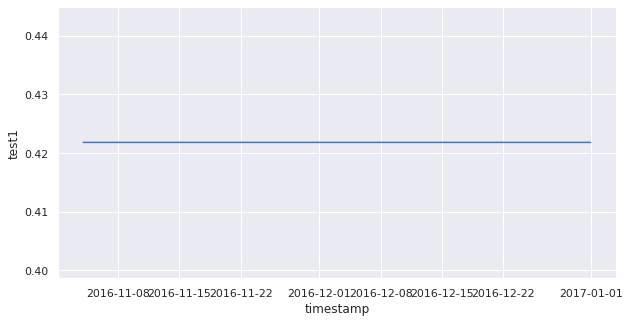

In [0]:
bid = 1221
m = 0
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_context("notebook")
plt.figure(figsize=(10, 5))

sns.lineplot(x="timestamp", y="test1",data= merge[(merge['building_id'] == bid) & (merge['meter'] == m)])


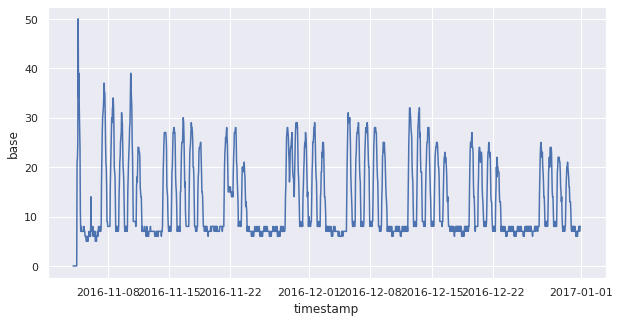

In [0]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="timestamp", y="base",data=merge[(merge['building_id'] == bid) & (merge['meter'] == m)])

#結果検証終了

In [0]:
sample_submission.loc[test_df['meter'] == 0, 'meter_reading'] = np.expm1(y_test0)
sample_submission.loc[test_df['meter'] == 1, 'meter_reading'] = np.expm1(y_test1)
sample_submission.loc[test_df['meter'] == 2, 'meter_reading'] = np.expm1(y_test2)
sample_submission.loc[test_df['meter'] == 3, 'meter_reading'] = np.expm1(y_test3)
sample_submission['meter_reading'] = sample_submission['meter_reading'].clip(lower=0)#1105ADD

In [0]:
sample_submission.to_csv('1215_sample_submission_org.csv')
gdrive_up('1215_sample_submission_org.csv')

In [0]:
'''#トレーニングデータアンサンブル
import pandas.tseries.offsets as offsets
train_df = reduce_mem_usage(pd.read_csv('train.csv', parse_dates=['timestamp']))
off = reduce_mem_usage(train_df)
off2 = off
off['timestamp'] = off['timestamp'] + offsets.MonthOffset(12)
off2['timestamp'] = off2['timestamp'] + offsets.MonthOffset(24)
off = pd.concat([off,off2])
del off2
off.timestamp = pd.to_datetime(off.timestamp)
off.head()
'''

Memory usage of dataframe is 616.95 MB
Memory usage after optimization is: 289.19 MB
Decreased by 53.1%
Memory usage of dataframe is 289.19 MB
Memory usage after optimization is: 289.19 MB
Decreased by 0.0%


,building_id,meter,timestamp,meter_reading
0,0,0,2019-01-01,0.0
1,1,0,2019-01-01,0.0
2,2,0,2019-01-01,0.0
3,3,0,2019-01-01,0.0
4,4,0,2019-01-01,0.0


#Min-Max Round

In [0]:
'''
#Month Round　効果なし
gdrive_dl('1210_Bestsubmission.csv')
sample_submission = pd.read_csv('1210_Bestsubmission.csv') 
test_df = reduce_mem_usage(pd.read_csv('test.csv', parse_dates=['timestamp']))
preprocess(test_df)
test_df = pd.merge(test_df,sample_submission, on=['row_id'],how='left')
test_df = test_df[['row_id','building_id','month','meter','meter_reading']]
max = train_df.groupby(['building_id','meter','month']).max().reset_index()[['building_id','meter','month', 'meter_reading']]
max = max.rename(columns={'meter_reading': 'meter_reading_max'})
min = train_df.groupby(['building_id','meter','month']).min().reset_index()[['building_id','meter','month', 'meter_reading']]
min = min.rename(columns={'meter_reading': 'meter_reading_min'})
maxmin = pd.merge(max,min,how='inner',on=['building_id','meter','month'])
del max ,min
print(test_df.shape)
test_df = pd.merge(test_df,maxmin,how='left',on=['building_id','meter','month'])
print(test_df.shape)
test_df.loc[test_df['meter_reading_max'].isnull(),'meter_reading_max'] = test_df['meter_reading']
test_df.loc[test_df['meter_reading_min'].isnull(),'meter_reading_min'] = test_df['meter_reading']
print(len(test_df[test_df['meter_reading_max'] < test_df['meter_reading']]))
print(len(test_df[test_df['meter_reading'] < test_df['meter_reading_min']]))
test_df.loc[test_df['meter_reading_max'] < test_df['meter_reading'], 'meter_reading'] = test_df['meter_reading_max']
test_df.loc[test_df['meter_reading'] < test_df['meter_reading_min'], 'meter_reading'] = test_df['meter_reading_min']
test_df = test_df[['row_id','meter_reading']]
sample_submission = sample_submission.merge(test_df,how='inner',on='row_id')
sample_submission = sample_submission.rename(columns={'meter_reading_x': 'meter_reading'})
sample_submission = sample_submission[['row_id','meter_reading']]
'''

GoogleドライブからColab環境への[1210_Bestsubmission.csv]ファイル取り込みが完了しました.
Memory usage of dataframe is 1272.51 MB
Memory usage after optimization is: 596.49 MB
Decreased by 53.1%
(41697600, 5)
(41697600, 7)
1449368
1681806


In [0]:
'''
#Dayofweek Round 1212　効果なし
test_df = reduce_mem_usage(pd.read_csv('test.csv', parse_dates=['timestamp']))
preprocess(test_df)
test_df = pd.merge(test_df,sample_submission, on=['row_id'],how='left')
test_df = test_df[['row_id','building_id','month','dayofweek','meter','meter_reading']]
max = train_df.groupby(['building_id','meter','month','dayofweek']).max().reset_index()[['building_id','meter','month','dayofweek', 'meter_reading']]
max = max.rename(columns={'meter_reading': 'meter_reading_max'})
min = train_df.groupby(['building_id','meter','month','dayofweek']).min().reset_index()[['building_id','meter','month','dayofweek', 'meter_reading']]
min = min.rename(columns={'meter_reading': 'meter_reading_min'})
maxmin = pd.merge(max,min,how='inner',on=['building_id','meter','month','dayofweek'])
del max ,min
print(test_df.shape)
test_df = pd.merge(test_df,maxmin,how='left',on=['building_id','meter','month','dayofweek'])
print(test_df.shape)
test_df.loc[test_df['meter_reading_max'].isnull(),'meter_reading_max'] = test_df['meter_reading']
test_df.loc[test_df['meter_reading_min'].isnull(),'meter_reading_min'] = test_df['meter_reading']
print(len(test_df[test_df['meter_reading_max'] < test_df['meter_reading']]))
print(len(test_df[test_df['meter_reading'] < test_df['meter_reading_min']]))
test_df.loc[test_df['meter_reading_max'] < test_df['meter_reading'], 'meter_reading'] = test_df['meter_reading_max']
test_df.loc[test_df['meter_reading'] < test_df['meter_reading_min'], 'meter_reading'] = test_df['meter_reading_min']
test_df = test_df[['row_id','meter_reading']]
sample_submission = sample_submission.merge(test_df,how='inner',on='row_id')
sample_submission = sample_submission.rename(columns={'meter_reading_x': 'meter_reading'})
sample_submission = sample_submission[['row_id','meter_reading']]
'''

Memory usage of dataframe is 1272.51 MB
Memory usage after optimization is: 596.49 MB
Decreased by 53.1%
(41697600, 6)
(41697600, 8)
2662576
4211225


#Training Validation

In [0]:
'''660 662 666 667 669　677 トレーニングアンサンブルと一部の予測値を別のサブミッションファイルで上書き
gdrive_dl('1210_Bestsubmission.csv')
sample_submission = pd.read_csv('1210_Bestsubmission.csv') 
test_df = reduce_mem_usage(pd.read_csv('test.csv', parse_dates=['timestamp']))
test_df['date'] = test_df['timestamp'].dt.date
preprocess_ex(test_df)

test_df = pd.merge(sample_submission,test_df,how ='left',on='row_id')
test_df = test_df[['row_id','building_id','meter','meter_reading','hour','month','day']]

gdrive_dl('halfhalf.csv')
sample_submission = pd.read_csv('halfhalf.csv') 
test_df = pd.merge(sample_submission,test_df,how ='left',on='row_id')
test_df = reduce_mem_usage(test_df)
test_df.head()
'''

GoogleドライブからColab環境への[1210_Bestsubmission.csv]ファイル取り込みが完了しました.
Memory usage of dataframe is 1272.51 MB
Memory usage after optimization is: 596.49 MB
Decreased by 53.1%
GoogleドライブからColab環境への[halfhalf.csv]ファイル取り込みが完了しました.
Memory usage of dataframe is 2346.19 MB
Memory usage after optimization is: 1033.91 MB
Decreased by 55.9%


,row_id,meter_reading_x,building_id,meter,meter_reading_y,hour,month,day
0,0,92.729485,0,0,173.370300,0,1,1
1,1,41.220722,1,0,53.512699,0,1,1
2,2,2.686540,2,0,6.143000,0,1,1
3,3,139.413605,3,0,101.701500,0,1,1
4,4,620.063782,4,0,1141.240723,0,1,1


In [0]:
'''
#外れ値の除外終了まで
preprocess_ex(train_df)
train_df = train_df[['building_id','meter','meter_reading','hour','month','day']]
train_df['building_id'] = train_df['building_id'].astype(np.int64)
train_df['meter'] = train_df['meter'].astype(np.int64)
train_df = train_df.rename(columns={'meter_reading': 'base'})
train_df = reduce_mem_usage(train_df)
test_df = pd.merge(test_df,train_df,how ='left',on=['building_id','meter','hour','day','month'])
test_df.loc[test_df['base'] < 0,'base'] = test_df['meter_reading_x']
#print(len(test_df.loc[abs(test_df['base'] - test_df['meter_reading_x']) > abs(test_df['base'] - test_df['meter_reading_y'])))
test_df.loc[abs(test_df['base'] - test_df['meter_reading_x']) > abs(test_df['base'] - test_df['meter_reading_y']),'meter_reading_x'] =  test_df['meter_reading_y']
test_df = test_df[['row_id','meter_reading_x']]
test_df = test_df.rename(columns={'meter_reading_x': 'meter_reading'})
test_df.tail()
test_df = test_df.drop_duplicates(subset='row_id',keep='last')
sample_submission = test_df
'''

Memory usage of dataframe is 1246.35 MB
Memory usage after optimization is: 400.61 MB
Decreased by 67.9%


,row_id,meter_reading_x,building_id,meter,meter_reading_y,hour,month,day,base
0,0,92.729485,0,0,173.370300,0,1,1,NaN
1,1,41.220722,1,0,53.512699,0,1,1,NaN
2,2,2.686540,2,0,6.143000,0,1,1,NaN
3,3,139.413605,3,0,101.701500,0,1,1,NaN
4,4,620.063782,4,0,1141.240723,0,1,1,NaN


#予測が大外れの値を別のサブミッションファイルで上書き



In [0]:
#線形回帰が大外れの箇所の置換 1072
test_df = reduce_mem_usage(pd.read_csv('test.csv', parse_dates=['timestamp']))
test_df['date'] = test_df['timestamp'].dt.date
preprocess_ex(test_df)
gdrive_dl('halfhalf.csv')
sample_submission = pd.read_csv('halfhalf.csv') 
test_df = pd.merge(sample_submission,test_df,how ='left',on='row_id')
test_df = reduce_mem_usage(test_df)
test_df = test_df.loc[((test_df['building_id'].isin([1072,1079,1098,1305]) & (test_df['meter'] == 2)) | (test_df['building_id'].isin([1219]) & (test_df['meter'] == 1)) | ((test_df['building_id'].isin([1099]) & (test_df['meter'] == 0))))]
test_df = test_df[['row_id','meter_reading']]
gdrive_dl('0.956BestSubmission.csv')
sample_submission = pd.read_csv('0.956BestSubmission.csv') 
sample_submission = pd.merge(sample_submission,test_df,how ='left',on='row_id')
sample_submission.loc[~sample_submission['meter_reading_y'].isnull(),'meter_reading_x'] = sample_submission[~sample_submission['meter_reading_y'].isnull()]['meter_reading_y']
sample_submission = sample_submission.rename(columns={'meter_reading_x': 'meter_reading'})
del sample_submission['meter_reading_y']

Memory usage of dataframe is 1272.51 MB
Memory usage after optimization is: 596.49 MB
Decreased by 53.1%
GoogleドライブからColab環境への[halfhalf.csv]ファイル取り込みが完了しました.
Memory usage of dataframe is 3022.21 MB
Memory usage after optimization is: 1471.36 MB
Decreased by 51.3%
GoogleドライブからColab環境への[0.957BestSubmission.csv]ファイル取り込みが完了しました.


In [0]:
#Half Half
'''
test_df = reduce_mem_usage(pd.read_csv('test.csv', parse_dates=['timestamp']))
test_df['date'] = test_df['timestamp'].dt.date
preprocess_ex(test_df)
gdrive_dl('halfhalf.csv')
sample_submission = pd.read_csv('halfhalf.csv') 
test_df = pd.merge(sample_submission,test_df,how ='left',on='row_id')
test_df = reduce_mem_usage(test_df)
test_df = test_df.loc[(test_df['building_id'].isin([660,662,660,662,666,667,669,677,683,686,688,690,696,697,698,700,703,704,705,706,709,710,711,712,713,715,716,717,718,719,720,722,725,728,729,731,734,737,747,748])) & (test_df['meter'] == 0)]
test_df = test_df[['row_id','meter_reading']]
gdrive_dl('1210_Bestsubmission.csv')
sample_submission = pd.read_csv('1210_Bestsubmission.csv') 
sample_submission = pd.merge(sample_submission,test_df,how ='left',on='row_id')
sample_submission.loc[~sample_submission['meter_reading_y'].isnull(),'meter_reading_x'] = sample_submission[~sample_submission['meter_reading_y'].isnull()]['meter_reading_y']
sample_submission = sample_submission.rename(columns={'meter_reading_x': 'meter_reading'})
del sample_submission['meter_reading_y']
'''

Memory usage of dataframe is 1272.51 MB
Memory usage after optimization is: 596.49 MB
Decreased by 53.1%
GoogleドライブからColab環境への[halfhalf.csv]ファイル取り込みが完了しました.
Memory usage of dataframe is 3022.21 MB
Memory usage after optimization is: 1471.36 MB
Decreased by 51.3%
GoogleドライブからColab環境への[1210_Bestsubmission.csv]ファイル取り込みが完了しました.


In [0]:
sample_submission

,row_id,meter_reading
0,0,173.3703
1,1,53.5127
2,2,6.1430
3,3,101.7015
4,4,1141.2407
...,...,...
41697595,41697595,6.5129
41697596,41697596,5.1714
41697597,41697597,0.3910
41697598,41697598,174.7597


#公開リークデータ上書き　
site0 1 2 4 15

In [0]:
import feather
gdrive_dl('leak.feather')
test_df = reduce_mem_usage(pd.read_csv('test.csv', parse_dates=['timestamp']))
#データフレームの読み込み
leak_df = feather.read_dataframe('leak.feather')
leak_df.head()

leak_df = pd.merge(leak_df,test_df, on = ['building_id', 'meter', 'timestamp'], how = "inner")
leak_df = leak_df[['row_id','meter_reading']]

sample_submission = pd.merge(sample_submission,leak_df, on ='row_id',how='left')
sample_submission = sample_submission.rename(columns={'meter_reading_x': 'meter_reading'})
sample_submission.loc[sample_submission['meter_reading_y'] >= -1,'meter_reading'] =sample_submission['meter_reading_y']
sample_submission = sample_submission[['row_id','meter_reading']]

GoogleドライブからColab環境への[leak.feather]ファイル取り込みが完了しました.
Memory usage of dataframe is 1272.51 MB
Memory usage after optimization is: 596.49 MB
Decreased by 53.1%


In [0]:
sample_submission.to_csv('1214_2submission.csv', index=False, float_format='%.4f')

In [0]:
gdrive_up('1214_2submission.csv')

In [0]:
!kaggle competitions submit -c ashrae-energy-prediction -f 1214_2submission.csv -m "liner re bug fix"

100% 679M/679M [00:33<00:00, 21.5MB/s]
Successfully submitted to ASHRAE - Great Energy Predictor III

In [0]:
!kaggle competitions submissions -c ashrae-energy-prediction

fileName                     date                 description                  status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------  --------  -----------  ------------  
1214_2submission.csv         2019-12-14 11:37:15  liner re bug fix             complete  0.956        None          
1214_submission.csv          2019-12-14 05:17:23  training val                 complete  0.999        None          
1213_2submission.csv         2019-12-13 14:44:34  half                         complete  0.961        None          
1213_submission.csv          2019-12-13 14:06:18  shuffle                      complete  0.961        None          
1212_submission.csv          2019-12-12 12:00:19  dayofweek round              complete  0.958        None          
1211_2submission.csv         2019-12-11 14:26:05  training unsamble            complete  0.977        None          
1211_submission.csv          2019-12-11 13:28:25  leak_feather r